In [3]:
import glob
#import datetime

import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft, fft2, ifft2, fftshift
from astropy.time import Time
from astropy import units as u

from decimal import *
from gpclock import isot_time, get_isot
from gpclock import read_header, get_time_delay, get_TB_sec, read_prf

In [2]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))

In [3]:
prf_earth = np.genfromtxt(earth_list[0], skip_header=14).T

In [4]:
original = prf_earth[1]
shift = np.roll(prf_earth[1], -1150)

In [5]:
##### type(original)

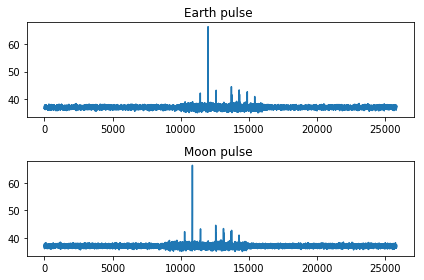

In [6]:
plt.close()
plt.subplot(2, 1, 1)
plt.plot(original)
plt.title("Earth pulse ")

# !!! Две строки, три столбца.
# !!! Текущая ячейка - 2
plt.subplot(2, 1, 2)
plt.plot(shift)
plt.title("Moon pulse ")

plt.tight_layout()

plt.show()

In [7]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))
moon_list = sorted(glob.glob('./final_test/*moon.csv'))

In [9]:
def save_tim(file, time_array):
    with open(file, 'w') as f:
        for idx, value in enumerate(time_array):
            fs_p, sc_p = str(value.to_mjd()).split('.')
            sec = str(round(float( '0.' + sc_p)*24*60*60, 15))
            f.write(fs_p + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\n')
        
    return None

In [32]:
def save_tim_moon(file, time_array, file_shift, tay):
    shift_file = np.genfromtxt(file_shift).T
    with open(file, 'w') as f:
        for idx, value in enumerate(time_array):
            fs_p, sc_p = str(value.to_mjd()).split('.')
            sec = str(round(float( '0.' + sc_p)*24*60*60, 15) + shift_file[3][idx]*tay)
            f.write(fs_p + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\n')

    return None

In [10]:
time_list_earth = []
for i, _ in enumerate(earth_list):
    header = read_header(earth_list[i])
    # print(header)
    prf_earth = np.genfromtxt(earth_list[i], skip_header=14).T

    time_start_earth = isot_time(get_isot(header))
    time_list_earth.append(time_start_earth)

In [11]:
time_list_moon = []
for i, _ in enumerate(moon_list):
    header = read_header(moon_list[i])
    # print(header)
    prf_earth = np.genfromtxt(moon_list[i], skip_header=14).T

    time_start_moon = isot_time(get_isot(header))
    time_list_moon.append(time_start_moon)


In [12]:
save_tim('./earth.out', time_list_earth)

In [34]:
save_tim_moon('./moon.out', time_list_earth, './shift.csv',1.2288/1000)

In [36]:
for i, _ in enumerate(earth_list):
    header = read_header(earth_list[i])
    # print(header)
    prf_earth = np.genfromtxt(earth_list[i], skip_header=14).T

    time_start_earth = isot_time(get_isot(header))
    fs_p_earth = np.round(time_start_earth.to_mjd(), 6)

    header = read_header(moon_list[i])
    prf_moon = np.genfromtxt(moon_list[i], skip_header=14).T
    # print(header)

    time_start_moon = isot_time(get_isot(header))
    fs_p_moon = np.round(time_start_moon.to_mjd(), 6)

    tay = 1.2288/1000.
    ts_e = get_TB_sec('./earth.out', fs_p_earth)
    ts_m = get_TB_sec('./moon.out', fs_p_moon)

    print(get_time_delay(0, 0, prf_earth[1], prf_moon[1], 1))
    print('-'*10)
    print(get_time_delay(ts_e, ts_m, prf_earth[1], prf_moon[1], tay))

-774
----------
-0.0749568
-265
----------
0.3760128
2344
----------
3.5254272
1357
----------
2.4477696
260
----------
0.7102464
1427
----------
2.8643328
-954
----------
-0.9302016
1634
----------
2.1737472


In [38]:
from decimal import *
306*1.2288/1000.0

0.3760128

In [28]:
253*1.2288/1000.0

0.3108864

In [30]:
2786*1.2288/1000.0

3.4234367999999993

In [29]:
429*1.2288/1000.0

0.5271551999999999

In [43]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))
moon_list = sorted(glob.glob('./final_test/*moon.csv'))
shift_file = np.genfromtxt('./shift.csv').T
for file_earth, file_moon, shift in zip(earth_list, moon_list, shift_file[3]):
    head_earth = read_header(file_earth)
    head_moon = read_header(file_moon)
    
    print(head_earth['utctime'], head_moon['utctime'], shift, shift*1.2288/1000)
    print(20*'-')

2:19:20.921382 02:19:21.004940400 68.0 0.08355839999999999
--------------------
0:17:26.735784 00:17:27.823272000 885.0 1.0874879999999998
--------------------
22:27:21.497308 22:27:22.439797600 767.0 0.9424895999999999
--------------------
6:30:45.999567 06:30:46.641000600 522.0 0.6414335999999999
--------------------
10:30:35.545417 10:30:36.652565800 901.0 1.1071488
--------------------
21:35:48.160213 21:35:48.399829000 195.0 0.239616
--------------------
13:40:5.8787752 13:40:07.065796000 966.0 1.1870208
--------------------
17:32:3.3406294 17:32:03.688379800 283.0 0.34775039999999996
--------------------


In [26]:
dt_s, dt_ms = str(round(253 * 1.2288/1000, 9)).split('.')                                                                               
print(dt_s, dt_ms)

0 3108864


In [22]:
shifted_time = str(np.datetime64('2002-05-05T02:19:20.921382')                                          
                   + np.timedelta64(dt_s, 's')
                   + np.timedelta64(dt_ms + '0'*(9-len(dt_ms)), 'ns')                                            
                  ) 

In [23]:
shifted_time

'2002-05-05T02:19:21.137650800'

In [18]:
np.datetime64('2002-05-05T02:19:20.921382') + np.timedelta64(dt_s, 's') + np.timedelta64('216268800', 'ns')

numpy.datetime64('2002-05-05T02:19:21.137650800')

In [16]:
a = '2162688'
print(a + '0'*(9-len(a))) 

216268800


In [72]:
21.232268400 - 20.921382

0.31088639999999756

In [73]:
8361.23229864 - 8360.921417184

0.310881456000061

In [35]:
earth_file = np.genfromtxt('./earth.out').T
moon_file = np.genfromtxt('./moon.out').T
shift_file = np.genfromtxt('./shift.csv').T
for time_earth, time_moon, shift in zip(earth_file[3], moon_file[3], shift_file[3]):    
    a = abs(time_earth - time_moon)
    b = shift*1.2288/1000
    print(a, b, np.abs(a-b))
    print(20*'-')

0.8761343999995006 0.8761343999999999 4.992672941739329e-13
--------------------
0.70164479999994 0.7016448 5.995204332975845e-14
--------------------
0.6451200000010431 0.6451199999999999 1.043165553937797e-12
--------------------
0.7802880000017467 0.7802879999999999 1.7468249069452213e-12
--------------------
0.39075839999713935 0.39075839999999995 2.8606006452491783e-12
--------------------
1.11083520000102 1.1108352 1.0200729150255938e-12
--------------------
0.24207359999854816 0.24207359999999997 1.4518108937267016e-12
--------------------
0.1658880000031786 0.16588799999999998 3.1786240306530544e-12
--------------------


In [37]:
a = Decimal(5.13245686135465)

In [40]:
np.float64(a)

5.13245686135465

In [41]:
24*60*60

86400

In [19]:
def get_array(filename):
    "Help"
    tim_array = np.genfromtxt(filename, dtype='str').T
    return tim_array[[0, 1, 3], :]

In [50]:
def get_TB_sec_array(array, MJD):
    "Help"
    mjd_5_sing = [
        np.round(int(mjd) + np.float64(utsec)/86400, 6)
        for mjd, utsec in zip(array[0], array[1])
    ]
    idx = np.where(np.asarray(mjd_5_sing) == MJD)

    return float(array[2][idx].item())

In [51]:
get_TB_sec_array(get_array('data4test/_tim.out'), 50856.318472)

True
(array([0], dtype=int64),)


27275.56058022

In [37]:
get_array('data4test/_tim.out')

array([['50856', '50993', '51000', '51004', '51017', '51157'],
       ['27516.00282619', '70646.00440272', '74214.00293870',
        '70438.00264227', '69890.00291787', '23251.00541471'],
       ['27275.56058022', '70383.50272350', '73937.07694551',
        '70158.82784806', '69645.26628208', '22998.56407834']],
      dtype='<U14')

In [41]:
get_TB_sec('data4test/_tim.out', 50856.318472)

ValueError: can only convert an array of size 1 to a Python scalar

In [39]:
round(50856 + 27516.00282619/86400, 6)

50856.318472